## Methodology to classify posts as positive for a campaign.

In this notebook the data base from Moro, Rita and Vala (2016) available at the UCI Machine Learning Repository is going ot be used to classify a facebook post as positive for a campaign by using two different methodologies applied to three columns, which are:

1. comment,	


2. like,	


3. share,

and perhaps two toher columns that are related with the kind of post, such as:

4. Type,

5. Category.

It is important to explore the database in order to do any of the methods proposed.


## Exploring the data base

The most important things that it is necessary to ensure in a process of data analysis are:

1. There are not outliers

2. Data is normaly distributed

3. Between features variation is similar

4. Categories are evenly distributed

In the following cells such characteristics are addressed.


In [1]:
#Let's import the dependencies
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt



In [7]:
#Call the database

wd = "C:/Users/avalo/OneDrive/Documentos/tec_documentos_plataforma/facebook_work/facebook_mock.csv"

df = pd.read_csv(wd)
df.head()

,Page.total.likes,Type,Category,Post.Month,Post.Weekday,Post.Hour,Paid,LPost.Tot.Reach,LPost.Tot.Impressions,Lifetime.Engaged.Users,LPost.Consumers,LPost.Consumptions,LPost.Liked.Page.Impressions,LPost.Liked.Page.Reach,LPeople.Post.Like...Engange,comment,like,share,Total.Interactions,Clus_km
0,139441,Photo,2,12,4,3,0,2752,5091,178,109,159,3078,1640,119,4,79,17,100,0
1,139441,Status,2,12,3,10,0,10460,19057,1457,1361,1674,11710,6112,1108,5,130,29,164,0
2,139441,Photo,3,12,3,3,0,2413,4373,177,113,154,2812,1503,132,0,66,14,80,0
3,139441,Photo,2,12,2,10,1,50128,87991,2211,790,1119,61027,32048,1386,58,1572,147,1777,1
4,139441,Photo,2,12,2,3,0,7244,13594,671,410,580,6228,3200,396,19,325,49,393,1


In [8]:
#Let's see how many columns (features) we have and how many rows (observations)
df.shape

(716, 20)

In [9]:
#Let's see a statisitical description of the df
df.describe()

,Page.total.likes,Category,Post.Month,Post.Weekday,Post.Hour,Paid,LPost.Tot.Reach,LPost.Tot.Impressions,Lifetime.Engaged.Users,LPost.Consumers,LPost.Consumptions,LPost.Liked.Page.Impressions,LPost.Liked.Page.Reach,LPeople.Post.Like...Engange,comment,like,share,Total.Interactions,Clus_km
count,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,7.160000e+02,716.000000,716.000000,716.000000,7.160000e+02,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000
mean,123917.229050,1.952514,7.241620,4.055866,7.463687,0.301676,21698.659218,4.052634e+04,1205.374302,1013.071229,1754.554469,2.253187e+04,9875.656425,770.910615,11.776536,290.282123,39.282123,341.340782,0.393855
std,15810.657369,0.846536,3.266957,1.986586,4.279412,0.459306,24680.132309,6.556378e+04,1014.820688,951.389001,1895.091259,4.704425e+04,9134.737677,645.799519,13.634297,304.641633,32.131135,335.348763,0.488945
min,81370.000000,1.000000,0.000000,0.000000,0.000000,0.000000,238.000000,5.700000e+02,9.000000,9.000000,0.000000,5.670000e+02,115.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,113472.500000,1.000000,5.000000,2.000000,3.000000,0.000000,4021.000000,7.143500e+03,512.000000,394.250000,622.000000,4.823000e+03,2682.500000,340.000000,2.000000,74.000000,14.000000,94.750000,0.000000
50%,128522.500000,2.000000,7.000000,4.000000,7.000000,0.000000,10061.000000,1.700350e+04,860.000000,676.500000,1130.000000,1.161450e+04,6230.000000,505.000000,6.000000,155.000000,29.000000,203.000000,0.000000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,34537.500000,5.718775e+04,1718.000000,1398.000000,2380.250000,2.968650e+04,15447.750000,1098.000000,19.000000,442.000000,60.000000,528.250000,1.000000
max,161385.000000,3.000000,16.000000,10.000000,23.000000,1.000000,158208.000000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,48368.000000,4376.000000,64.000000,1639.000000,162.000000,1806.000000,1.000000


It is observed that there is a very big variation (check max and min values together with the standard deviation) in each feature. This issue must be adressed through a standarization.

Another useful tool to explore data is a scatterplot matrix with an histogram in the diagonal, as shown below.

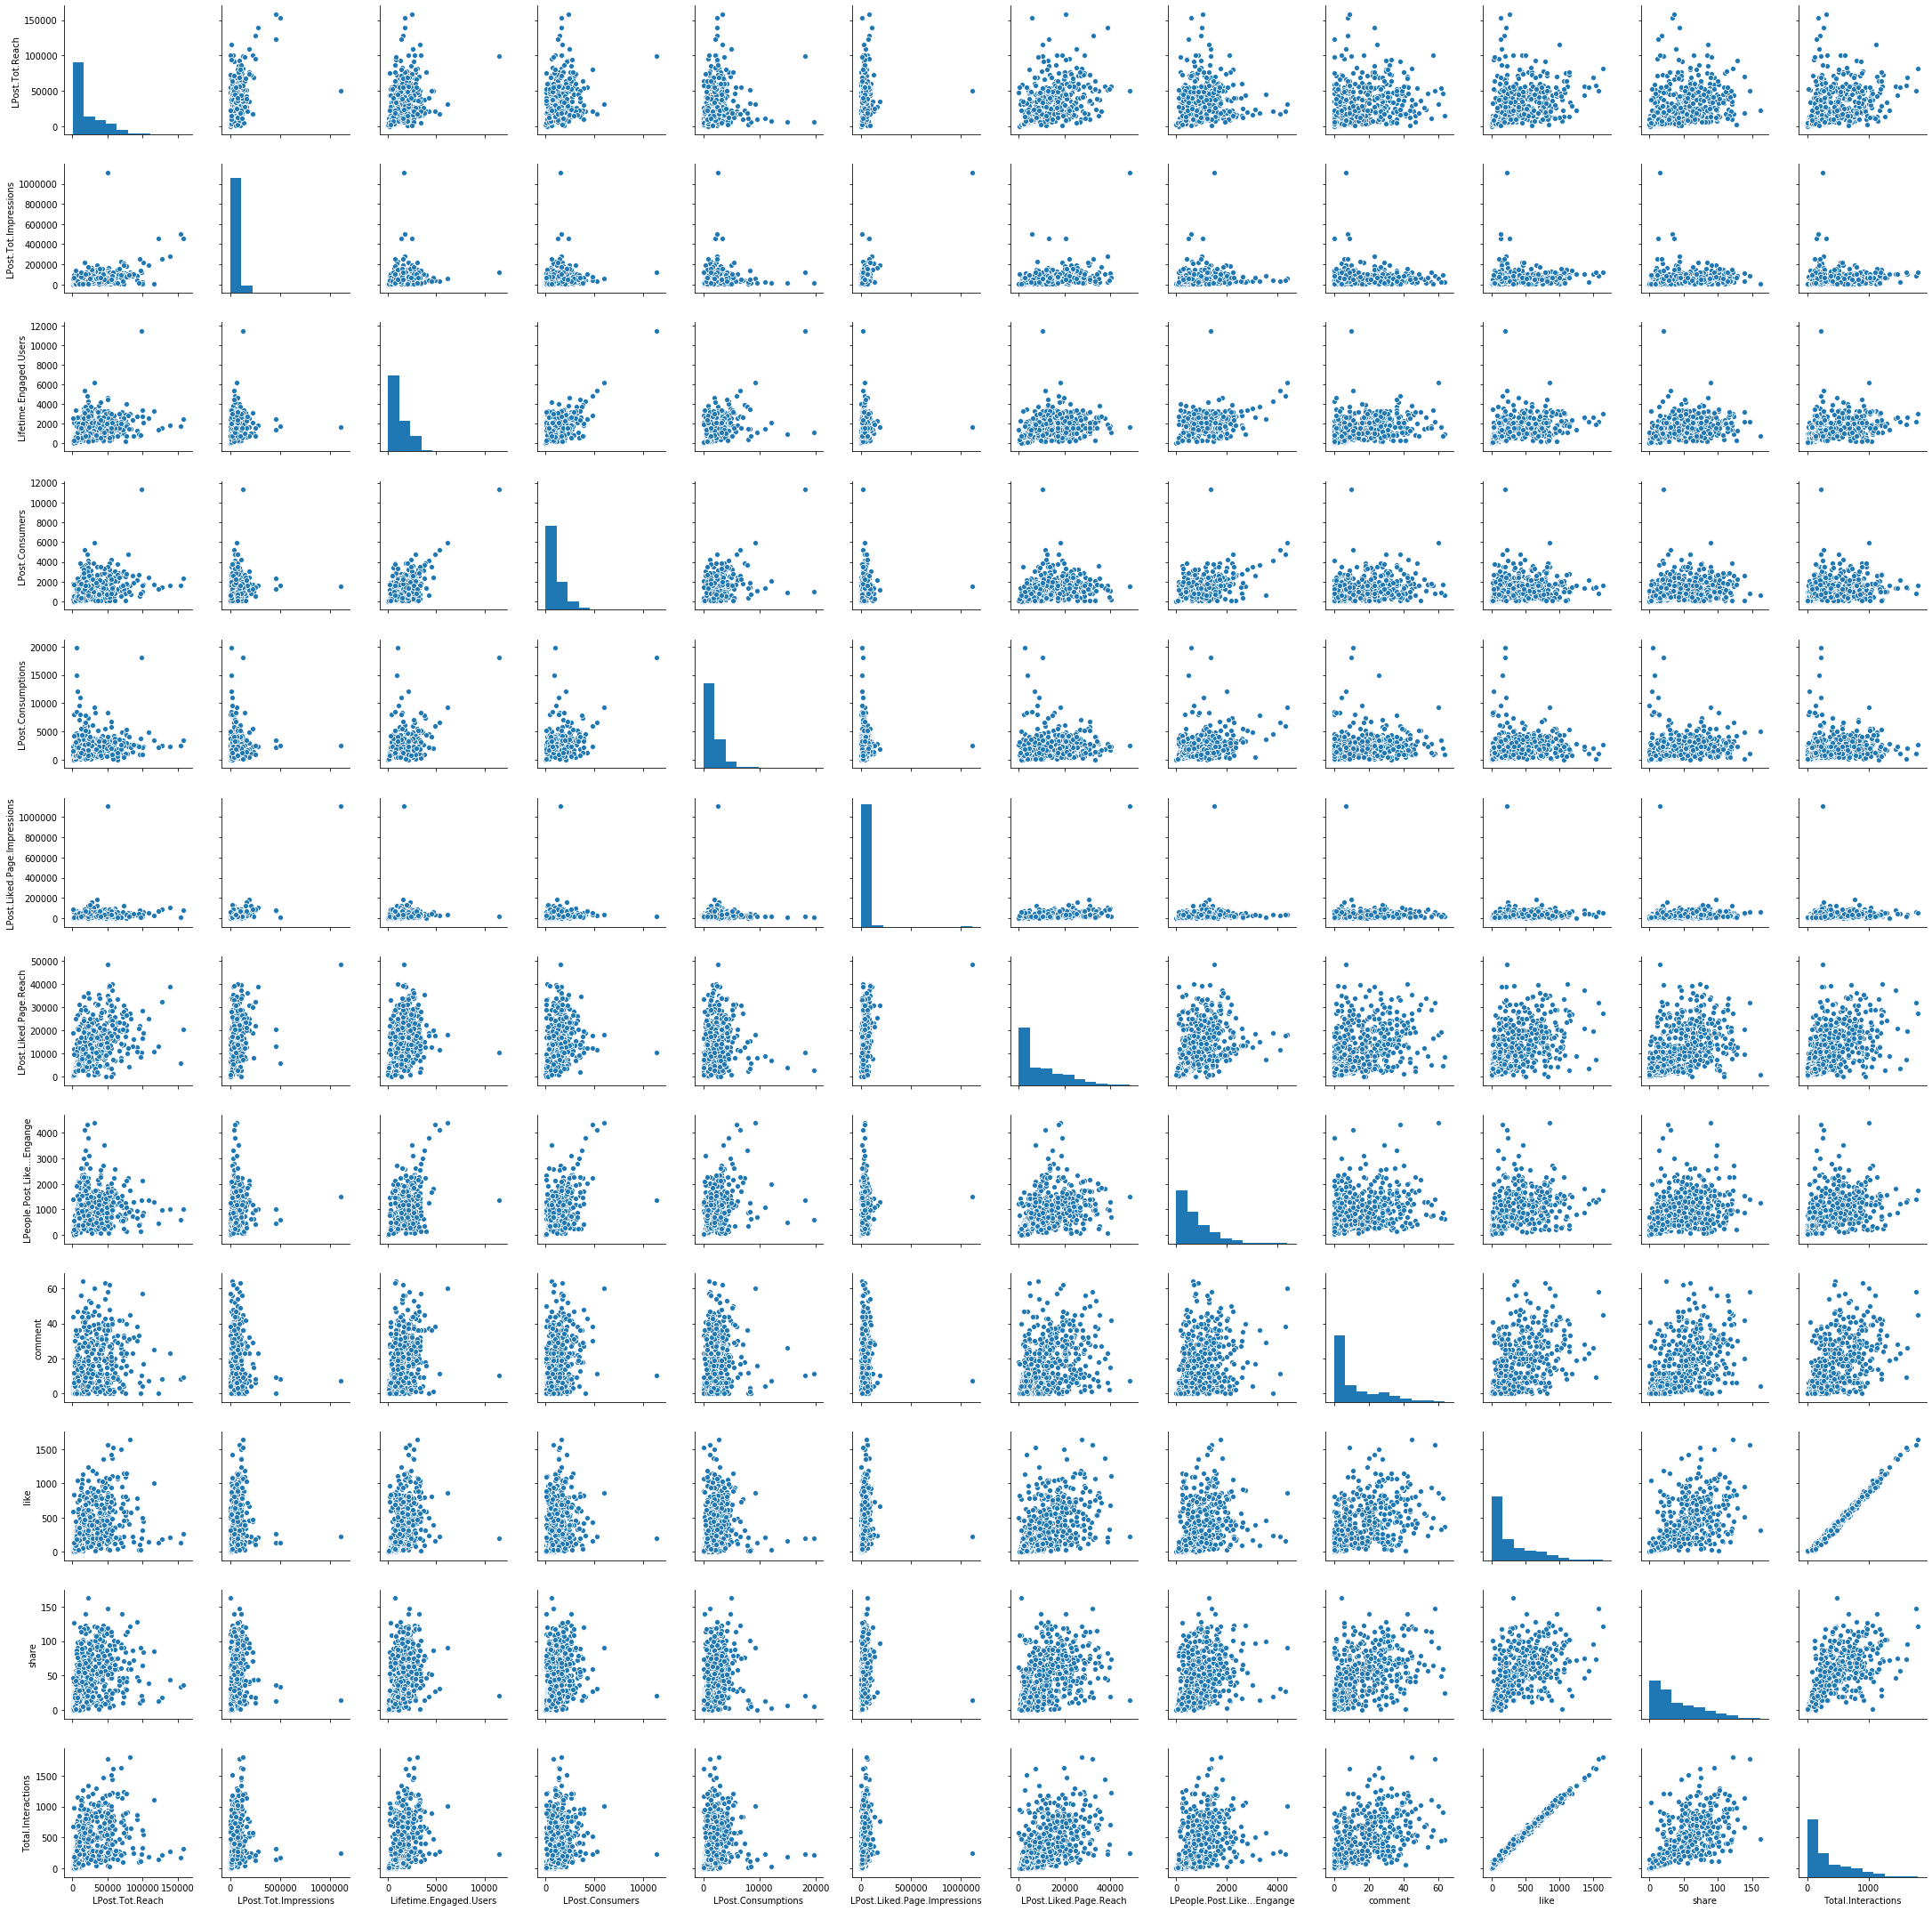

In [11]:
names = ["LPost.Tot.Reach", "LPost.Tot.Impressions", "Lifetime.Engaged.Users", "LPost.Consumers",
         "LPost.Consumptions", "LPost.Liked.Page.Impressions", "LPost.Liked.Page.Reach",
         "LPeople.Post.Like...Engange", "comment","like","share",	"Total.Interactions"]

import seaborn as sns

sns.pairplot(df[names], kind='scatter', diag_kind='hist')#, corner=True)

It is observed that most of the features are distributed around a certain value (high columns in each histogram). However, there are some values that are less frequent. In the scatterplots it is observed that there are some points very far from the distribution of most of the data. In order to know if this observations can be seen as outliers a boxplot graph for each variable can be done. It is importat to know that this is only a visual tool and not necessarily a statistical test.

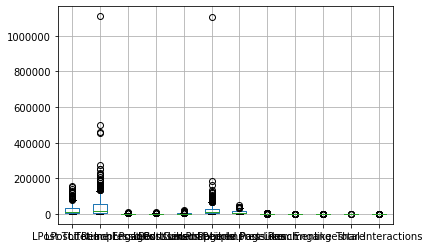

In [12]:
df.boxplot(column=names)

In [ ]:
#pip install outlier_utils 

In [13]:
#gRUBS TEST

from outliers import smirnov_grubbs as grubbs

p_values =[]

for name in names:
    #print(df[name].values)
    a = grubbs.max_test_outliers(df[name].values, alpha=.05)
    p_values.append(a)
    

print(f"In the following list the possition of possible outliers is presented {a}")



In the following list the possition of possible outliers is presented [1806, 1777, 1626, 1616]


In [14]:
#To understand better lest present it as a df
outliers = pd.DataFrame(list(zip(names, a)), 
               columns =['Variable', 'position']) 
outliers

,Variable,position
0,LPost.Tot.Reach,1806
1,LPost.Tot.Impressions,1777
2,Lifetime.Engaged.Users,1626
3,LPost.Consumers,1616


Finaly, let's find out how doe categories are distributed. The categories of interest is:

1. Type

2. Category	

3. Post Month	

4. Post Weekday	

5. Post Hour

6. Paid

In [15]:
count_type = df['Type'].value_counts()
count_type


Photo     592
Status     76
Video      26
Link       22
Name: Type, dtype: int64

In [16]:
count_category = df['Category'].value_counts()
count_category


1    274
3    240
2    202
Name: Category, dtype: int64

In [17]:
count_paid = df['Paid'].value_counts()
count_paid


0    500
1    216
Name: Paid, dtype: int64

In [19]:
count_month = df['Post.Month'].value_counts()
count_month


10    75
7     70
8     69
11    68
6     67
4     67
9     64
12    61
5     57
3     46
2     30
1     30
14     6
13     3
16     1
15     1
0      1
Name: Post.Month, dtype: int64

In [20]:
count_day = df['Post.Weekday'].value_counts()
count_day


4     116
3     106
6     104
5     104
2     102
7      91
1      78
0       8
8       5
10      1
9       1
Name: Post.Weekday, dtype: int64

In [21]:
count_hour = df['Post.Hour'].value_counts()
count_hour


3     129
10     89
13     56
11     55
4      48
2      46
9      45
6      43
12     41
5      38
8      30
7      28
1      20
14     16
15     10
0       7
17      5
18      3
16      2
20      2
22      1
19      1
23      1
Name: Post.Hour, dtype: int64

It is observed that most of the publications are unpaid photos. The most common hour to make a post is 3 am, and the day and the month are almost equaly distributed.

### Principal component analysis

Principal component analysis is a methodology whose aim is to reduce dimensions or the number of features  by building a linear combination of the features. Such linear combination can be written as:

$$ y_{i}= a_{1}x_{1} + a_{2}x_{2}+...+a_{n}x_{n}$$

where $a_{i}'s$ are known as weights and are an indicator of the importance of each variable, and $n$ is the number of features.

In [22]:
#Lets extract data
X = df.iloc[:, 15:18].values
X

array([[  4,  79,  17],
       [  5, 130,  29],
       [  0,  66,  14],
       ...,
       [ 49, 690,  68],
       [ 25, 194,  56],
       [ 21, 737,  75]], dtype=int64)

In [23]:
#Scale the data
from sklearn.preprocessing import StandardScaler

my_scaler = StandardScaler()
X_scaled=my_scaler.fit_transform(X)
X_scaled

array([[-0.5707645 , -0.69402799, -0.69395929],
       [-0.49736877, -0.52650115, -0.32022868],
       [-0.86434738, -0.73673091, -0.78739195],
       ...,
       [ 2.73204298,  1.31300932,  0.89439582],
       [ 0.97054566, -0.31627138,  0.52066521],
       [ 0.67696277,  1.4673968 ,  1.11240535]])

In [24]:
# Applying PCA function on training 
pca = PCA(n_components=2) #creamos el objeto

principalComponents = pca.fit_transform(X_scaled) # obteniendo las componentes principales

principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2']) # Crear un df con las PC
principalDataframe

,PC1,PC2
0,-1.132565,0.079458
1,-0.775137,-0.085869
2,-1.377083,-0.105865
3,6.332823,-0.153761
4,0.541314,0.261625
...,...,...
711,3.451757,1.083629
712,1.685442,-0.508719
713,2.827230,1.400834
714,0.663409,0.673208


In [25]:
components = pca.components_
components

array([[ 0.56199162,  0.58675709,  0.5829936 ],
       [ 0.82452021, -0.34131641, -0.45129761]])

Therefore, the princial component that we are going to use to explain the the success of a facebook publication is going to be the first principal component, specifically it is going to be the score, i.e.

$$ success = 0.54*comment + 0.60*like + 0.59*share $$
$$ success_{new}= 0.56*comment +0.59*like+0.58*share$$

In [26]:
#Let's generate a new df
success = principalDataframe[["PC1"]]
success

,PC1
0,-1.132565
1,-0.775137
2,-1.377083
3,6.332823
4,0.541314
...,...
711,3.451757
712,1.685442
713,2.827230
714,0.663409


In [28]:
#Generate a new df with only the three featues used in the PCA MODEL
new_df = pd.DataFrame(X, columns=['comment','like', 'share'])
new_df

,comment,like,share
0,4,79,17
1,5,130,29
2,0,66,14
3,58,1572,147
4,19,325,49
...,...,...,...
711,50,889,79
712,19,636,79
713,49,690,68
714,25,194,56


In [29]:
#Add the success column
new_df["success"] = success
new_df.head()

,comment,like,share,success
0,4,79,17,-1.132565
1,5,130,29,-0.775137
2,0,66,14,-1.377083
3,58,1572,147,6.332823
4,19,325,49,0.541314


In [30]:
new_df.shape

(716, 4)

In [31]:
new_df[["comment","like", "share", "success"]].describe()

,comment,like,share,success
count,716.000000,716.000000,716.000000,7.160000e+02
mean,11.776536,290.282123,39.282123,9.985805e-17
std,13.634297,304.641633,32.131135,1.494281e+00
min,0.000000,0.000000,0.000000,-1.758487e+00
25%,2.000000,74.000000,14.000000,-1.255527e+00
50%,6.000000,155.000000,29.000000,-5.524769e-01
75%,19.000000,442.000000,60.000000,1.174972e+00
max,64.000000,1639.000000,162.000000,6.332823e+00


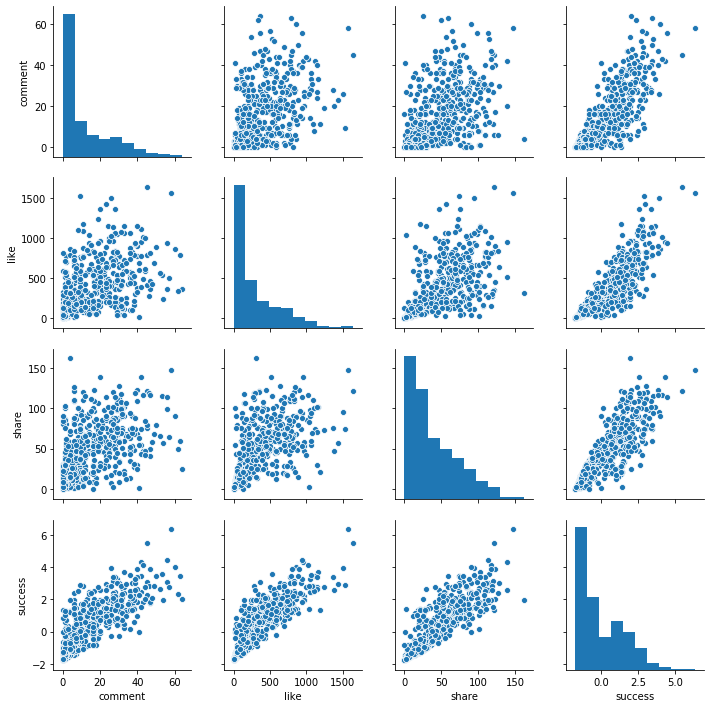

In [32]:
#Scatterplot matrix
import seaborn as sns

sns.pairplot(new_df[["comment","like", "share", "success"]])

## Grouping data in two sets (Succesful an unsuccesful posts)

The k-means clustering method is an unsupervised machine learning technique used to identify clusters of data objects in a dataset. There are many different types of clustering methods, but k-means is one of the oldest and most approachable. These traits make implementing k-means clustering in Python reasonably straightforward, even for novice programmers and data scientists.

Conventional k-means requires only a few steps. The first step is to randomly select k centroids, where k is equal to the number of clusters you choose. Centroids are data points representing the center of a cluster.

The main element of the algorithm works by a two-step process called expectation-maximization. The expectation step assigns each data point to its nearest centroid. Then, the maximization step computes the mean of all the points for each cluster and sets the new centroid.

In [33]:
from sklearn.cluster import KMeans 

#Lets define how many groups we want
clusterNum = 2

#Lets define the number of iterations
iterationNum = 20

#Lets define the object
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = iterationNum)


In [34]:
#Lets fit with X scaled
k_means.fit(X_scaled)
labels = k_means.labels_
print(labels)

[0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 1 

In [35]:
#Lets add the labels into new_df
new_df["Clus_km"] = labels
new_df.head(5)

,comment,like,share,success,Clus_km
0,4,79,17,-1.132565,0
1,5,130,29,-0.775137,0
2,0,66,14,-1.377083,0
3,58,1572,147,6.332823,1
4,19,325,49,0.541314,1


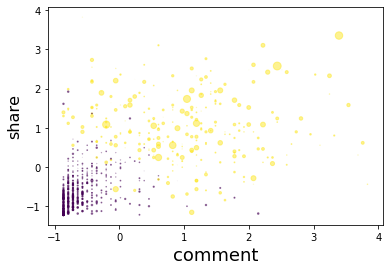

In [36]:
#Let's visualize the finla result
area = np.pi * ( X_scaled[:, 1])**2  
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('comment', fontsize=18)
plt.ylabel('share', fontsize=16)
plt.show()

In [37]:
#Let's count the number of elements in each group
cluster_count = new_df['Clus_km'].value_counts()
cluster_count

0    456
1    260
Name: Clus_km, dtype: int64